**Importing important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

**Reading the training data and preprocessing the given dataset**

In [2]:
df= pd.read_csv('fraudTrain.csv',index_col=0)

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(1296675, 22)

In [5]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')

df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek 
df['month'] = df['trans_date_trans_time'].dt.month
df['quarter'] = df['trans_date_trans_time'].dt.quarter
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,day_of_week,month,quarter
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,1,1


In [7]:
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

current_date = pd.to_datetime('today')
df['age_cust'] = (current_date.year - df['dob'].dt.year).astype(int)

In [8]:
df.shape

(1296675, 28)

In [9]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,hour,day,day_of_week,month,quarter,age_cust
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,0,1,1,1,1,36
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,0,1,1,1,1,46
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,0,1,1,1,1,62
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,0,1,1,1,1,57
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,0,1,1,1,1,38


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def encode(df):
    df['merchant'] = le.fit_transform(df['merchant'])
    df['category'] = le.fit_transform(df['category'])
    df['job'] = le.fit_transform(df['job'])
    df['zip'] = le.fit_transform(df['zip'])
    return df

df = encode(df)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,hour,day,day_of_week,month,quarter,age_cust
0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,0,1,1,1,1,36
1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,0,1,1,1,1,46
2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,0,1,1,1,1,62
3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,0,1,1,1,1,57
4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,0,1,1,1,1,38


In [11]:
df= pd.get_dummies(df, columns=['gender'], prefix='gender')

df['gender_M'] = df['gender_M'].astype(int)
df['gender_F'] = df['gender_F'].astype(int)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,street,city,state,...,merch_long,is_fraud,hour,day,day_of_week,month,quarter,age_cust,gender_F,gender_M
0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,-82.048315,0,0,1,1,1,1,36,1,0
1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,-118.186462,0,0,1,1,1,1,46,1,0
2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,-112.154481,0,0,1,1,1,1,62,0,1
3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,-112.561071,0,0,1,1,1,1,57,0,1
4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,-78.632459,0,0,1,1,1,1,38,0,1


In [12]:
def clean_df(df):
    return df.drop(['first', 'last', 'street', 'city', 'state', 'lat','long','city_pop','merch_lat','merch_long','trans_date_trans_time','dob','age_cust'],axis=1)

df = clean_df(df)

In [13]:
df.head()

,cc_num,merchant,category,amt,zip,job,trans_num,unix_time,is_fraud,hour,day,day_of_week,month,quarter,gender_F,gender_M
0,2703186189652095,514,8,4.97,265,370,0b242abb623afc578575680df30655b9,1325376018,0,0,1,1,1,1,1,0
1,630423337322,241,4,107.23,965,428,1f76529f8574734946361c461b024d99,1325376044,0,0,1,1,1,1,1,0
2,38859492057661,390,0,220.11,858,307,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,0,1,1,1,1,0,1
3,3534093764340240,360,2,45.00,614,328,6b849c168bdad6f867558c3793159a81,1325376076,0,0,1,1,1,1,0,1
4,375534208663984,297,9,41.96,231,116,a41d7549acf90789359a9aa5346dcb46,1325376186,0,0,1,1,1,1,0,1


In [14]:
df=df.drop(['trans_num','cc_num','unix_time'],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   merchant     1296675 non-null  int32  
 1   category     1296675 non-null  int32  
 2   amt          1296675 non-null  float64
 3   zip          1296675 non-null  int64  
 4   job          1296675 non-null  int32  
 5   is_fraud     1296675 non-null  int64  
 6   hour         1296675 non-null  int32  
 7   day          1296675 non-null  int32  
 8   day_of_week  1296675 non-null  int32  
 9   month        1296675 non-null  int32  
 10  quarter      1296675 non-null  int32  
 11  gender_F     1296675 non-null  int32  
 12  gender_M     1296675 non-null  int32  
dtypes: float64(1), int32(10), int64(2)
memory usage: 89.0 MB


**Reading the training data and preprocessing the given dataset**

In [16]:
df2=pd.read_csv('fraudTest.csv',index_col=0)

In [17]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [18]:
df2['trans_date_trans_time'] = pd.to_datetime(df2['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')

df2['hour'] = df2['trans_date_trans_time'].dt.hour
df2['day'] = df2['trans_date_trans_time'].dt.day
df2['day_of_week'] = df2['trans_date_trans_time'].dt.dayofweek 
df2['month'] = df2['trans_date_trans_time'].dt.month
df2['quarter'] = df2['trans_date_trans_time'].dt.quarter
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,day_of_week,month,quarter
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,21,6,6,2
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,21,6,6,2
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,21,6,6,2
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,21,6,6,2
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,21,6,6,2


In [19]:
df2['dob'] = pd.to_datetime(df2['dob'], format='%Y-%m-%d')

current_date = pd.to_datetime('today')
df2['age_cust'] = (current_date.year - df2['dob'].dt.year).astype(int)

In [20]:
df2['merchant'] = df2['merchant'].apply(lambda x : x.replace('fraud_',''))
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,hour,day,day_of_week,month,quarter,age_cust
0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,1371816865,33.986391,-81.200714,0,12,21,6,6,2,56
1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,1371816873,39.450498,-109.960431,0,12,21,6,6,2,34
2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,1371816893,40.495810,-74.196111,0,12,21,6,6,2,54
3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,1371816915,28.812398,-80.883061,0,12,21,6,6,2,37
4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1371816917,44.959148,-85.884734,0,12,21,6,6,2,69


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def encode(df2):
    df2['merchant'] = le.fit_transform(df2['merchant'])
    df2['category'] = le.fit_transform(df2['category'])
    df2['job'] = le.fit_transform(df2['job'])
    df2['zip'] = le.fit_transform(df2['zip'])
    return df2

df2 = encode(df2)

df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,hour,day,day_of_week,month,quarter,age_cust
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,1371816865,33.986391,-81.200714,0,12,21,6,6,2,56
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,1371816873,39.450498,-109.960431,0,12,21,6,6,2,34
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,1371816893,40.495810,-74.196111,0,12,21,6,6,2,54
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,1371816915,28.812398,-80.883061,0,12,21,6,6,2,37
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1371816917,44.959148,-85.884734,0,12,21,6,6,2,69


In [22]:
df2= pd.get_dummies(df2, columns=['gender'], prefix='gender')

df2['gender_M'] = df2['gender_M'].astype(int)
df2['gender_F'] = df2['gender_F'].astype(int)

df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,street,city,state,...,merch_long,is_fraud,hour,day,day_of_week,month,quarter,age_cust,gender_F,gender_M
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,351 Darlene Green,Columbia,SC,...,-81.200714,0,12,21,6,6,2,56,0,1
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,3638 Marsh Union,Altonah,UT,...,-109.960431,0,12,21,6,6,2,34,1,0
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,9333 Valentine Point,Bellmore,NY,...,-74.196111,0,12,21,6,6,2,54,1,0
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,32941 Krystal Mill Apt. 552,Titusville,FL,...,-80.883061,0,12,21,6,6,2,37,0,1
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,5783 Evan Roads Apt. 465,Falmouth,MI,...,-85.884734,0,12,21,6,6,2,69,0,1


In [23]:
def clean_df2(df2):
    return df2.drop(['first', 'last', 'street', 'city', 'state', 'lat','long','city_pop','merch_lat','merch_long','trans_date_trans_time','dob','age_cust'],axis=1)

df2 = clean_df2(df2)

In [24]:
df2=df2.drop(['trans_num','cc_num','unix_time'],axis=1)

In [25]:
df2.head()

,merchant,category,amt,zip,job,is_fraud,hour,day,day_of_week,month,quarter,gender_F,gender_M
0,319,10,2.86,254,275,0,12,21,6,6,2,0,1
1,591,10,29.84,811,392,0,12,21,6,6,2,1,0
2,611,5,41.28,69,259,0,12,21,6,6,2,1,0
3,222,9,60.05,291,407,0,12,21,6,6,2,0,1
4,292,13,3.19,478,196,0,12,21,6,6,2,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   merchant     1296675 non-null  int32  
 1   category     1296675 non-null  int32  
 2   amt          1296675 non-null  float64
 3   zip          1296675 non-null  int64  
 4   job          1296675 non-null  int32  
 5   is_fraud     1296675 non-null  int64  
 6   hour         1296675 non-null  int32  
 7   day          1296675 non-null  int32  
 8   day_of_week  1296675 non-null  int32  
 9   month        1296675 non-null  int32  
 10  quarter      1296675 non-null  int32  
 11  gender_F     1296675 non-null  int32  
 12  gender_M     1296675 non-null  int32  
dtypes: float64(1), int32(10), int64(2)
memory usage: 89.0 MB


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   merchant     555719 non-null  int32  
 1   category     555719 non-null  int32  
 2   amt          555719 non-null  float64
 3   zip          555719 non-null  int64  
 4   job          555719 non-null  int32  
 5   is_fraud     555719 non-null  int64  
 6   hour         555719 non-null  int32  
 7   day          555719 non-null  int32  
 8   day_of_week  555719 non-null  int32  
 9   month        555719 non-null  int32  
 10  quarter      555719 non-null  int32  
 11  gender_F     555719 non-null  int32  
 12  gender_M     555719 non-null  int32  
dtypes: float64(1), int32(10), int64(2)
memory usage: 38.2 MB


**Random Forest model  performed the best with 99.79% accuracy**

**Performing Logistic Regression Model on the dataset**

In [28]:
X_train = df.drop(['is_fraud'], axis=1)
y_train = df['is_fraud']

X_test = df2.drop(['is_fraud'], axis=1)
y_test = df2['is_fraud']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9955876980992192
Confusion Matrix:
[[553267    307]
 [  2145      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



**Performing Decision Tree Classification on the dataset**

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_pred2= clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9972234168707567
Confusion Matrix:
[[552697    877]
 [   666   1479]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.63      0.69      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.81      0.84      0.83    555719
weighted avg       1.00      1.00      1.00    555719



**Performing Random Forest Classification on the dataset**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_samples=0.5, random_state=42)


In [32]:
rf = rf.fit(X_train, y_train)


In [33]:
y_pred3 = rf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9979899913445465
Confusion Matrix:
[[553464    110]
 [  1007   1138]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.91      0.53      0.67      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.77      0.83    555719
weighted avg       1.00      1.00      1.00    555719



**Plotting the ROC-AUC curve for all three models**

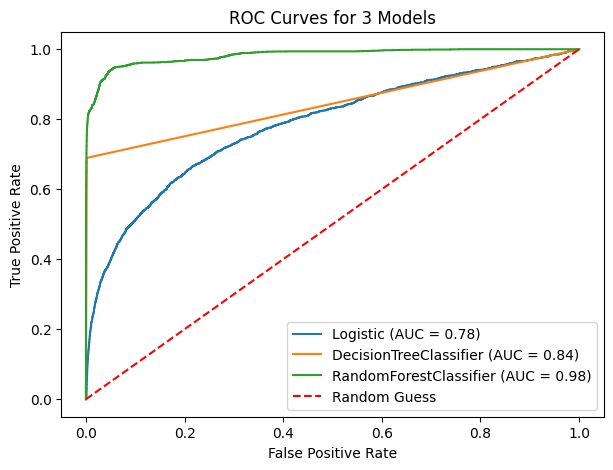

In [35]:
from sklearn.metrics import roc_curve, auc
y_pred_logistic = model.predict_proba(X_test)[:, 1]
y_pred_dt = clf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict_proba(X_test)[:, 1]
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'DecisionTreeClassifier': y_pred_dt, 'RandomForestClassifier': y_pred_rf})

plt.figure(figsize=(7, 5))
 
for model in ['Logistic', 'DecisionTreeClassifier', 'RandomForestClassifier']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
 

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 3 Models')
plt.legend()
plt.show()